# **Figure 5.** Densities
## **Table 3.**
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 08/03/2022          |
| Updated | 05/31/2023          |

,Run,⟨max(𝜌ₚ)⟩/𝜌₀,+𝜎_max(𝜌ₚ)/𝜌₀,-𝜎_max(𝜌ₚ)/𝜌₀
0,AB/0.01,64.6,9.7,-8.4
1,AB/0.02,61.3,8.8,-7.7
2,AB/0.05,56.0,8.3,-7.3
3,AB/0.10,53.4,8.0,-7.0
4,BA/0.01,708.5,281.4,-201.4
5,BA/0.02,511.2,277.7,-179.9
6,BA/0.05,192.1,179.8,-92.9
7,BA/0.10,24.7,5.7,-4.6


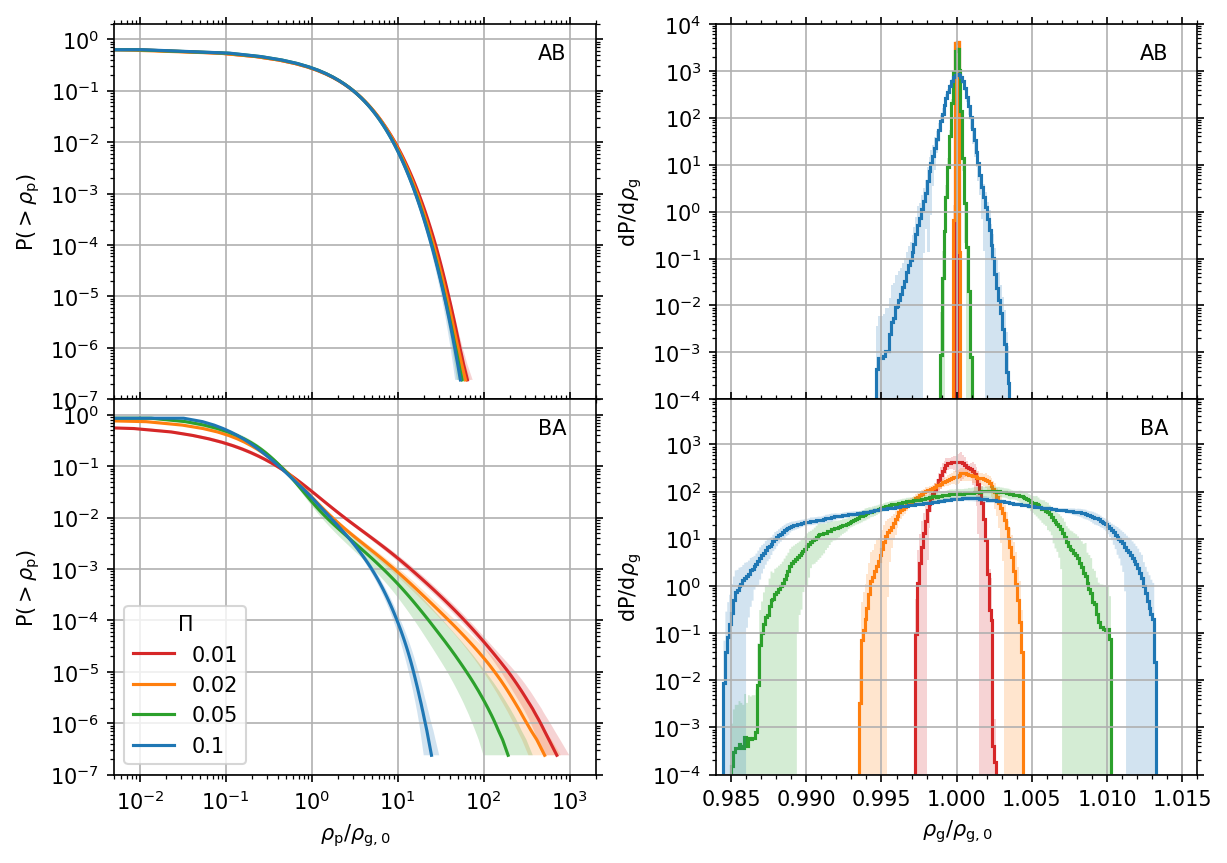

In [1]:
#==============================================================================
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, axs = plt.subplots(2, 2, sharex='col', figsize=(9.32, 6.5), dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:red'], ['0.02', 'tab:orange'],
       ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = '2048'
indices = -np.unique(np.logspace(np.log2(int(res)**2), 0, num=100,
                     base=2, dtype=int))
qtys = ['p', 'g']
runs, avg_maxs, err_maxs = [], [[], []], [[], []]

for i, case in enumerate(cases):
    for Pi in Pis:
        path = f'{workdir}/{cases[i]}/{Pi[0]}/{res}' 
        runs.append(f'{cases[i]}/{Pi[0]}')

        for j, qty in enumerate(qtys):
            data = np.load(f'{path}/npz/c{qty}dd.npz')
            if qty == 'p':
                take = np.take_along_axis(data['cdf'], indices, 0)
                cdf = np.flip(take)
                take = np.take_along_axis(data['avgs'], indices, 0)
                avgs = np.flip(take)
                take = np.take_along_axis(data['stds'], indices, 0)
                stds = np.flip(take)
                axs[i][j].loglog(avgs, cdf, color=Pi[1], label=float(Pi[0]))
                axs[i][j].fill_betweenx(cdf, avgs/stds, avgs*stds, color=Pi[1],
                                        ec=None, alpha=0.2)
            elif qty == 'g':
                """
                Revise according to new outputs from rhog_pdf.py
                """
                npz = np.load(f'{path}/npz/gas_densities.npz')
                bin_hi_rhos = npz['bin_avg_rhos'] + npz['bin_std_rhos']
                bin_lo_rhos = npz['bin_avg_rhos'] - npz['bin_std_rhos']
                axs[i][j].stairs(npz['bin_avg_rhos'], npz['bin_edges'],
                                 color=Pi[1], lw=1.5)
                axs[i][j].stairs(bin_hi_rhos, npz['bin_edges'], fill=True,
                                 baseline=bin_lo_rhos, color=Pi[1],alpha=0.2)
            avg_maxs[j].append(avgs[-1])
            err_maxs[j].append(stds[-1])

for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

dylim = (1e-7, 2e0)
axs[0][0].set(ylabel=r'P$(>\rho_\mathrm{p})$', ylim=dylim)
axs[0][0].text(0.94, 0.95, cases[0], ha='right', va='top',
               transform=axs[0][0].transAxes)
axs[0][1].set(yscale='log', ylabel=r'$\mathrm{dP}/\mathrm{d}\rho_\mathrm{g}$',
              ylim=(1e-4, 1e4))
axs[0][1].text(0.94, 0.95, cases[0], ha='right', va='top',
               transform=axs[0][1].transAxes)
axs[1][0].legend(loc='lower left', title=r'$\Pi$')
axs[1][0].set(xlim=(5e-3, 2e3), ylim=dylim,
              xlabel=r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$',
              ylabel=r'P$(>\rho_\mathrm{p})$')
axs[1][0].text(0.94, 0.95, cases[1], ha='right', va='top',
               transform=axs[1][0].transAxes)
axs[1][1].set(ylim=(1e-4, 9e3), yscale='log', xlim=(0.984, 1.016),
              xlabel=r'$\rho_\mathrm{g}/\rho_\mathrm{g,0}$',
              ylabel=r'$\mathrm{dP}/\mathrm{d}\rho_\mathrm{g}$')
axs[1][1].text(0.94, 0.95, cases[1], ha='right', va='top',
               transform=axs[1][1].transAxes)
plt.subplots_adjust(hspace=0, wspace=0.25)
plt.savefig('figs/densities.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/png/densities.png', bbox_inches='tight', pad_inches=0.01, dpi=1200)

df = pd.DataFrame({
    'Run'             : runs,
    '⟨max(𝜌ₚ)⟩/𝜌₀'   : avg_maxs[0],
    '+𝜎_max(𝜌ₚ)/𝜌₀' : np.asarray(avg_maxs[0])*(1*np.asarray(err_maxs[0]) - 1),
    '-𝜎_max(𝜌ₚ)/𝜌₀' : np.asarray(avg_maxs[0])*(1/np.asarray(err_maxs[0]) - 1),})
    # '⟨max(𝜌)⟩/𝜌₀'   : (np.asarray(avg_maxs[1]) - 1),
    # '𝜎_max(𝜌)/𝜌₀'  : err_maxs[1]})
s = df.style.format({
    '⟨max(𝜌ₚ)⟩/𝜌₀'   : '{:.1f}',
    '+𝜎_max(𝜌ₚ)/𝜌₀' : '{:.1f}',
    '-𝜎_max(𝜌ₚ)/𝜌₀' : '{:.1f}',})
    # '⟨max(𝜌)⟩/𝜌₀'   : '1 + {:.1e}',
    # '𝜎_max(𝜌)/𝜌₀'  : '±{:.1e}'})
s.to_latex(buf='tabs/densities.sty')
s

## Maximum density evolution (plot format)
NOTE: Actual data is $\sigma_{\rho_\mathrm{p}}(t)$

[Text(0.5, 0, '$t/T$')]

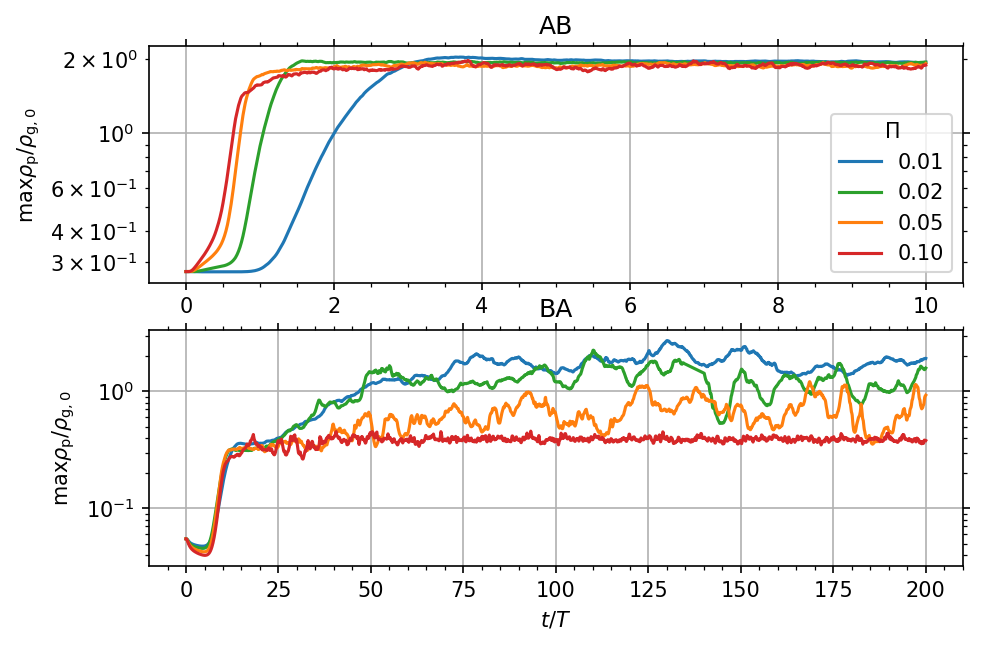

In [4]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 1, figsize=(7, 4.5), dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'

for i, case in enumerate(cases):
    for Pi in Pis:
        hst = athena_read.hst(f'{workdir}/{case}/{Pi[0]}/{res}/output/SI.hst')
        disp_rhop = np.sqrt(hst['drhop2'] - (hst['drhop'])**2)

        axs[i].semilogy(hst['time'], disp_rhop, color=Pi[1], label=Pi[0])

# Format subplots
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.set(ylabel=r'$\max{\rho_\mathrm{p}}/\rho_\mathrm{g,0}$')
    ax.tick_params(which='both', top=True, right=True)

axs[0].legend(loc='lower right', title=r'$\Pi$')
axs[0].set(title='AB')
axs[1].set(title='BA')
axs[1].set(xlabel=r'$t/T$')

# plt.savefig('figs/max_dust_densities.pdf', bbox_inches='tight', pad_inches=0.01)